In [4]:
url='headbrain.csv'
data = pd.read_csv(url)
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [6]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


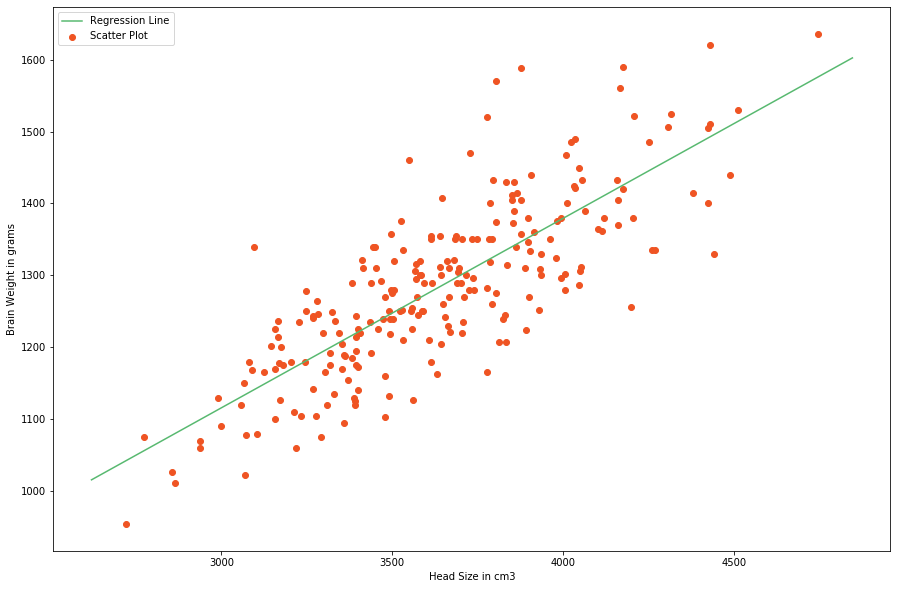

In [7]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [8]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [9]:

# Validation using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:

X = X.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [11]:

Y_pred = b0 + b1 * X
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [12]:

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


In [13]:
################......K.....N......N...

In [2]:
#creating a dataset
#INPUT
A=['DEAD','LIFE','REINCARNATION']
B=['POSSIBLE','IMPOSSIBLE','IMPOSSIBLE']
#OUTPUT
C=['YES','YES','NO']

#ENCODE
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
A_ENCODE=le.fit_transform(A)
B_ENCODE=le.fit_transform(B)
C_ENCODE=le.fit_transform(C)

#COALATING THE INPUTS
features=list(zip(A_ENCODE, B_ENCODE))

#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
my_model=KNeighborsClassifier(n_neighbors=1)

#TRAINING
my_model.fit(features,C)

#PREDICTION
prediction=my_model.predict([[1, 0]])
print(A_ENCODE)
print(B_ENCODE)
print(C_ENCODE)

prediction

[0 1 2]
[1 0 0]
[1 1 0]


array(['YES'], dtype='<U3')

In [15]:
######################...........LINEAR REGRESSION

(237, 4)
0.26342933948939945 325.57342104944223


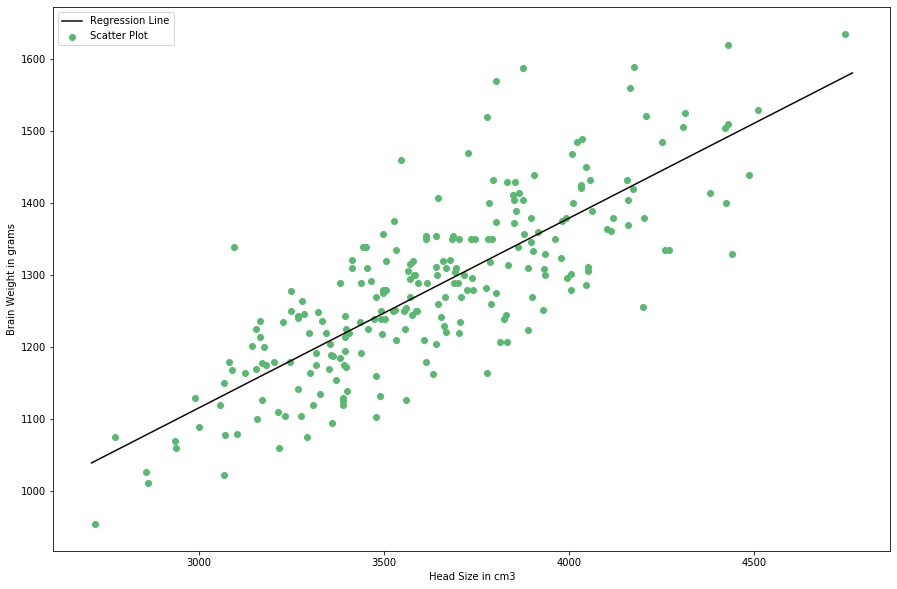

rmse = 72.1206213783709
0.6393117199570003


In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15.0, 10.0)

dataset=pd.read_csv('headbrain.csv')
print(dataset.shape)
dataset.head()

X=dataset['Head Size(cm^3)'].values
Y=dataset['Brain Weight(grams)'].values

X_mean=np.mean(X)
Y_mean=np.mean(Y)

m=len(X)
numerator=0
denominator=0

for i in range(m):
    numerator += (X[i]-X_mean)*(Y[i]-Y_mean)
    denominator += (X[i]-X_mean)**2
slope=numerator/denominator
intercept=Y_mean-(slope*X_mean)

print(slope, intercept)

 #y=0.263x+325
    
# Plotting Values and Regression Line
max_x = np.max(X) + 20
min_x = np.min(X) - 10

x = np.linspace(min_x, max_x, 100)
y = (slope*x)+intercept

# Ploting Line, the predicted
plt.plot(x, y, color='#120501', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, color='#58b970', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = intercept + slope * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print('rmse =', rmse)


# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(m):
    y_pred = intercept + slope * X[i]
    ss_tot += (Y[i] - Y_mean) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

In [43]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=load_boston()

dataset=pd.DataFrame(df.data)
#print(dataset.head())

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor, X,y,scoring='neg_mean_squared_error', cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

#############RIDGE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv=5)
print(ridge_regressor.best-score)

-26.70225907220975


AttributeError: 'GridSearchCV' object has no attribute 'best'